# init

In [1]:
# init
import numpy as np
import matplotlib.pyplot as plt

def rk4sys(rhs, xint, y0, h = 1, *args):
  """
  rk4sys: ODE solver based on 4th order Runge-Kutta method for a system of ODEs

  rk4sys(rhs, xint, y0, h = 1, *args):
           uses 4th order Runge-Kutta method to solve a system of ODEs
  input:
    rhs : the RHS function as rhs(x,y,*args) 
          where y is a vector of dependent variables
    xint: independent variable interval which can be specified 2 ways:
          1) [x0, xf] 
             where x0 is initial and xf is final value of independent variable.
             Output will be on x values in [x0 xf] interval with step size h
          2) [x0, x1, ..., xf] which are the specific x values for which solution 
              should be output
    y0 : vector of dependent variables initial value
    h : step size (h = 1 by default)
    *args : additional parameters passed to the rhs function
  output:
    x : vector of the independent variable
    y : vector of solution for all the dependent variables
  """
  import numpy as np
  # makeing sure x is in ascending order
  xdiff = np.diff(xint)
  assert np.min(xdiff) >= 0 , "x array is not in ascending order"

  n = xint.size - 1  # index for the last element of xint
  x0 = xint[0]
  xf = xint[-1]
  if n == 1:
    x = np.arange(x0, xf + h, h)
    n = x.size - 1  # index for the last element of x
    if x[n] < xf:
      np.append(x,xf)
      n = n + 1
  else:
    x = xint

  if np.isscalar(y0):
    m = 1  
  else:
    m = y0.size 
  yp = np.zeros((m,n+1),float)
  xp = np.zeros(n+1,float)
  xx = x0
  yy = y0
  np = 0
  xp[np] = xx
  yp[:,np] = yy
  i = 0
  while True:
    xend = x[np+1]
    hh = x[np+1] - x[np]
    if hh > h:
      hh = h
    while True:
      if xx + hh > xend:
        hh = xend - xx
      k1 = rhs(xx, yy, *args)  # calculates k1 using RHS function at x[i] and y[i,:]
      y1 = yy + k1 * 0.5 * hh
      k2 = rhs(xx + 0.5 * hh, y1, *args)
      y1 = yy + k2 * 0.5 * hh
      k3 = rhs(xx + 0.5 * hh, y1, *args)
      y1 = yy + k3 * hh
      k4 = rhs(xx + hh, y1, *args)
      phi = (k1 + 2. * (k2 + k3) + k4) / 6.
      yy1 =  yy + phi * hh
      xx = xx + hh
      i = i + 1
      yy = yy1
      if xx >= xend:
        break
    np = np + 1
    xp[np] = xx
    yp[:,np] = yy
    if xx >= xf:
      break
  return xp, yp

# Adaptive ODE  solvers

Adaptive ODE solvers use variable step size which is useful to increase the accuracy and efficiency of the solution especially when the solution involves sudden variation of variables. Variable step size allows (1) reducing the stsp size to capture the sharp changes in the solution and (2) increasing the step size when the solution has gradual variations to increase the speed of calculations. We use the built-in adaptive solvers in python `scipy` library. These solvers can be invoked using the [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) function. Several of the methods available are as follows. For more information about the methods and available input arguments visit the website linked above.
* `RK23`: Explicit Runge-Kutta method of order 3(2). (Non-stiff ODEs)
* `RK45`: Explicit Runge-Kutta method of order 5(4) (default). (Non-stiff ODEs)
* `Radau`: Implicit Runge-Kutta method of the Radau IIA family of order 5. (Stiff ODEs)
* `LSODA`: Adams/BDF method with automatic stiffness detection and switching. (Stiff/Non-stiff ODEs)

The adaptive solver control the step size to keep the local error smaller than the error tolerance defined as $\rm{atol} + \rm{rtol}\,|y|$ where $|y|$ is the absolute values of the dependent variable. The error tolerances $atol$ and $rtol$ are defined as follows:
* $rtol$: relative error tolerance: tolerance of error relative to the dependent variable value (number of correct digits) (default: $10^{-3}$).
* $atol$: relative error tolerance: tolerance of error for dependent variable values near zero (accuracy in representation of near zero values)(default: $10^{-6}$).

These error tolerances need to be specified carefully as they control the behavior of the ODE solver.


### Example

Solve ${dy \over dt} =  10e^{-(t-2)^2/2(0.075^2)}-0.6y$ with initial condition $y(0)=0.5$ from t=0 to 4 with the relative error tolerances of $10^{-3}$ and $10^{-4}$. Compare the results with the (non-adaptive) 4th order Runge-Kutta method.

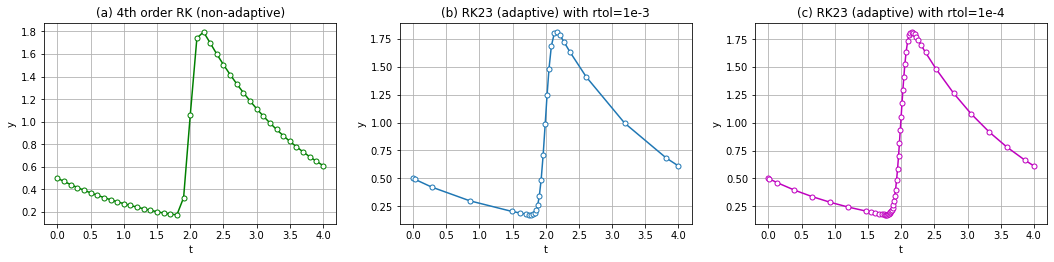

In [7]:
dy = lambda t, y: 10. * np.exp(-(t - 2.)**2 / (2. * 0.075**2)) - 0.6 * y
from scipy.integrate import solve_ivp

tint = np.array([0., 4.]) # t interval
y0 = np.array([0.5])   #initial condition

# 4th order Runge-Kutta (non-adaptive) with the fixed step size of h=0.1
t_rk4, y_rk4 = rk4sys(dy, tint, y0, h = 0.1)

# Solution with RK23 with rtol=1e-3
sol = solve_ivp(dy, tint , y0, method='RK23', rtol = 1e-3)
t_rk23_3 = sol.t
y_rk23_3 = sol.y

# Solution with RK23 with rtol=1e-4
sol = solve_ivp(dy, tint , y0, method='RK23', rtol = 1e-4)
t_rk23_4 = sol.t
y_rk23_4 = sol.y

plt.figure(figsize=(15,4))
plt.subplot(131)
plt.plot(t_rk4, y_rk4[0], 'go-', markersize=5, markerfacecolor='w')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y')
plt.title('(a) 4th order RK (non-adaptive)')
plt.subplot(132)
plt.plot(t_rk23_3, y_rk23_3[0], 'o-', markersize=5, markerfacecolor='w')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y')
plt.title('(b) RK23 (adaptive) with rtol=1e-3')
plt.subplot(133)
plt.plot(t_rk23_4, y_rk23_4[0], 'mo-', markersize=5, markerfacecolor='w')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y')
plt.title('(c) RK23 (adaptive) with rtol=1e-4')
plt.tight_layout(pad=2) #put spacing between the subplots
plt.show();



As shown in figure (a) the non-adaptive 4th order Runge-Kutta method uses too many points in regions with gradual variations (too much computations) but not enough points where there is sudden increase (less accuracy where needed). The adaptive nature of `RK23` is evident from figure (b). There are smaller number of points in gradual change regions but there are more points in corners and sudden variation location. Using `rtol=1e-4`, `RK23` adds more points and hence, enhances the accuracy of predictions where higher resolution is needed. As shown, the solution is on non-uniform `t` values as chosen by the solver to control the error.

If we need the solution at specific points we can use either
* `t_eval` parameter. Output the solution at specific points
* `dense_output`. With this paramter a interpolating mathematical function is outputted using which the solution can be calculated at the desired independent variable points.


Examples are provided below.


Using t_eval parameter:
[0. 1. 2. 3. 4.]
[0.5        0.27414175 1.05759305 1.11465955 0.6109168 ]

Using dense_output parameter:


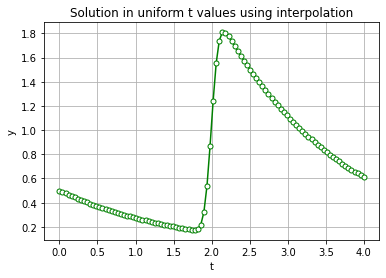

In [3]:
print('Using t_eval parameter:')
t_output = np.array([0., 1. , 2., 3., 4.]) # t output at these specific t values
sol = solve_ivp(dy, tint , y0, method='RK23', rtol = 1e-3, t_eval = t_output)
t = sol.t
y = sol.y
print(t)
print(y[0])
print()
print('Using dense_output parameter:')
sol1 = solve_ivp(dy, tint , y0, method='RK23', rtol = 1e-3, dense_output=True)
tp = np.linspace(0., 4., 100)  #generating equally spaced t points
yp = sol1.sol(tp)              #y values on equally spaced t points
plt.plot(tp, yp[0], 'go-', markersize=5, markerfacecolor='w')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solution in uniform t values using interpolation')
plt.show();

# Stiff ODE solvers

The adaptive ODE solvers have the ability to make the step size relatively small in regions where the solution displays sudden variations and alternatively, to make it relatively large where the solution has gradual variations. For certain systems that is not possible. In these systems the solution has a rapidly changing component together with a slowly changing one. As a results, a typical adaptive solver is required to take extremely small step sizes to provide a reliable solution even where the solution has seemly slow variations. This can lead to the solver diverging (failing to provide a solution), but even if it succeeds it takes an enormously long time to complete the solution which is often impratical. These are called stiff problems and it requires specific methods to overcome the stiffness. The solvers `Radau` and `LSODA`, as listed above, are able to solve stiff ODE systems.

# Example

Solve the van der Pol equation ${d^2y \over dt^2} - \mu (1-y^2){dy \over dt}+y=0$ with initial conditions $y(0)=y'(0)=1$ for two cases (a) non-stiff case, in which $\mu=1$, for t=$0$ to $20$, (b) stiff case, in which $\mu=1000$, for t=$0$ to $6000$.

To use a ODE solver we create a system of 1st order ODEs: 
$$\begin{cases} 
\frac{dy_1}{dt}=y_2\\
\frac{dy_2}{dt}=\mu (1-y_1^2)y_2+y_1 \\ 
\end{cases}$$
for the dependent variables $y_1$ and $y_2$. The initial conditions are $y_1(0)=y_2(0)=1$.

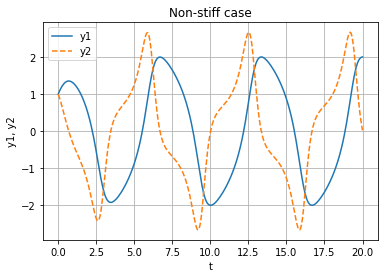

In [4]:
# Part (a) - nonstiff case
mu = 1.

dy = lambda t, y: np.array([y[1], mu * (1-y[0]**2)*y[1] - y[0]])
from scipy.integrate import solve_ivp

tint = np.array([0., 20.]) # t interval
y0 = np.array([1., 1.])   #initial condition

sol = solve_ivp(dy, tint , y0, method='RK23', rtol = 1e-4)
t = sol.t
y = sol.y

plt.plot(t, y[0], '-' , label='y1')
plt.plot(t, y[1], '--', label='y2')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y1, y2')
plt.title('Non-stiff case')
plt.legend()
plt.show();



The non-stiff cases can be solved using an adaptive solver `RK23`.

Trying 4th order Runge-Kutta:


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in add


Sample solution:  [ 1.00000000e+000  1.56815595e+000 -2.93470807e+015 -6.70666377e+265
              nan              nan              nan              nan
              nan              nan]
>>> Clearly, rk4sys fails. It gives solution in the order of e265 and nan (not a number)

Trying the stiff solver LSODA:


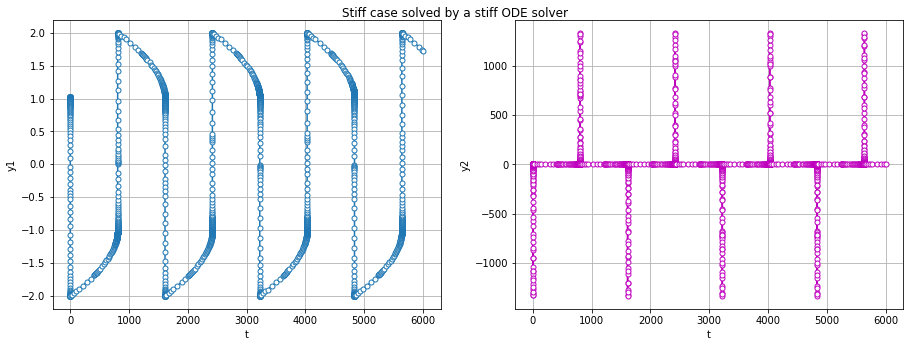

In [5]:
# Part (b) - stiff case
mu = 1000.

dy = lambda t, y: np.array([y[1], mu * (1-y[0]**2)*y[1] - y[0]])
from scipy.integrate import solve_ivp

tint = np.array([0., 6000.]) # t interval
y0 = np.array([1., 1.])   #initial condition


# Showing the failure of the 4th order Runge-Kutta (non-adaptive) with the fixed step size of h=0.1
print('Trying 4th order Runge-Kutta:')
t_rk4, y_rk4 = rk4sys(dy, tint, y0, h = 0.1)
print('Sample solution: ', y_rk4[0,0:10])
print('>>> Clearly, rk4sys fails. It gives solution in the order of e265 and nan (not a number)')
print()
print('Trying the stiff solver LSODA:')
sol = solve_ivp(dy, tint , y0, method='LSODA', rtol = 1e-4)
t = sol.t
y = sol.y

plt.figure(figsize=(13,5))
plt.subplot(121)
plt.plot(t, y[0], 'o-' , markersize=5, markerfacecolor='w')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y1')
plt.subplot(122)
plt.plot(t, y[1], 'mo-', markersize=5, markerfacecolor='w' )
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y2')
plt.tight_layout(pad=2) #put spacing between the subplots
plt.suptitle('Stiff case solved by a stiff ODE solver', fontsize=12)
plt.show();



As shown, the stiff case presents a solution which includes very rapidly changing components which can only be predicted using a stiff solver such as `LSODA`. The 4th order Runge-Kutta (non-adaptive) diverges as shown by providing unreasonably large solutions as wel as `nan` (not a number) output values which indicate failure of the solution. If we try an adaptive solver such `RK23` we will see that it take an unreasonabe amount of time (if ever)  to give a solution (try it out if you want but I had to terminate the solution at some point). This is because the step size is reduced to extremely small values to over come stiffness. By using the stiff solver `LSODA` we can obtain the solution for the stiff case efficiently and with high precision.

# Exercise 1

Solve the following ODE using an adaptive method:
$$\frac{dy}{dx}=\frac{1}{(x-0.3)^2+0.01}+\frac{1}{(x-0.9)^2+0.04}-6$$ with initial condition $y(0)=0$ for $x=0$ to $1$ and plot the solution.

# Exercise 2

Solve the following stiff ODE
$$\frac{dx}{dt}=-700x-1000e^{-t}$$ with initial condition $x(0)=4$ for $t=0$ to $5$ and plot the solution.